# Project Topic: Credit Card Fraud Detection<br>
This project focuses on building a machine learning model to detect fraudulent credit card transactions. With millions of transactions processed daily, identifying fraudulent activities in real-time is essential for reducing financial losses and ensuring security for cardholders. The goal is to develop an effective model capable of distinguishing between legitimate and fraudulent transactions based on various features.

**Problem Type:**<br>
The problem is primarily a supervised learning task where the goal is to classify transactions as either fraudulent or non-fraudulent based on labeled historical data. This places the problem within the domain of binary classification, where each transaction is categorized into one of two classes: "fraud" or "non-fraud."

However, fraud detection can also benefit from unsupervised learning approaches, particularly when dealing with cases where labels (fraud or non-fraud) may be incomplete or unavailable. Unsupervised learning methods can be applied to identify anomalies or outliers in the transaction data, which may correspond to fraudulent activities. These approaches allow us to detect suspicious transactions based on patterns and behaviors that deviate from the majority, even when explicit labels are not provided.

**Learning Algorithms:**
Since fraud detection can be approached with both supervised and unsupervised learning methods, the following algorithms will be explored:
1. Supervised Learning Algorithms:
    * Logistic Regression: A simple and interpretable model for binary classification.
    * Decision Trees: A non-parametric method useful for understanding decision-making processes.
    * Random Forests: An ensemble of decision trees that can improve accuracy by reducing overfitting.
    * Gradient Boosting Machines (GBM): Powerful algorithms that iteratively improve predictive performance.
    * Neural Networks: Deep learning approaches that can capture complex relationships in the data.
    * Support Vector Machines (SVM): A method that maximizes the margin between classes for improved generalization.<br>
2. Unsupervised Learning Algorithms:
    * Clustering (e.g., K-Means, DBSCAN): Clustering algorithms can group similar transactions together, and outliers (transactions that do not belong to any group) could be indicative of fraud.
    * Autoencoders: A type of neural network used to learn efficient representations of data. They can be employed for anomaly detection by reconstructing transactions and identifying those with high reconstruction error as potential fraud cases.
    * Isolation Forest: A tree-based anomaly detection method that isolates observations by randomly partitioning the data. Fraudulent transactions are likely to be isolated quickly due to their anomalous nature.
    * Principal Component Analysis (PCA): A dimensionality reduction technique that can be used to detect outliers in the data by analyzing deviations from the principal components.
    
**Motivation:**<br>
The primary motivation for this project is to develop a system capable of detecting fraudulent transactions with high accuracy while minimizing false positives. Fraud detection systems must quickly and reliably flag suspicious transactions to mitigate financial risk without unnecessarily inconveniencing customers with false alarms.

By utilizing both supervised and unsupervised learning methods, the project aims to identify fraud in both labeled and unlabeled datasets, ensuring robust performance on unseen data. The ultimate goal is to build a well-optimized model that detects fraudulent transactions efficiently, helping financial institutions minimize losses and enhance security.

## Unsupervised Learning Algorithm: Isolation Forest

**Why Isolation Forest?**<br>
The Isolation Forest is a highly effective algorithm for anomaly detection, which is ideal for detecting fraudulent transactions in the context of credit card fraud detection. Fraudulent transactions are rare and behave differently compared to the majority of normal transactions. Isolation Forest works by randomly partitioning the data and isolating observations that exhibit unusual patterns. Fraudulent transactions, being outliers, are more likely to be isolated early in the partitioning process, making them easier to detect.

**Here’s why I am using Isolation Forest for this problem:**<br>
* Efficiency and Scalability: Isolation Forest is computationally efficient, making it suitable for large datasets like those encountered in fraud detection. Its linear time complexity allows it to handle millions of transactions without a significant performance burden.
* Anomaly Detection Focus: Unlike clustering algorithms (which group similar points together), Isolation Forest specifically aims to detect anomalies. In fraud detection, we are more interested in finding outliers than grouping similar transactions.
* Interpretability: Isolation Forest provides intuitive results. The "isolation score" indicates how anomalous a transaction is, making it easier to rank and flag the most suspicious transactions.
* Robustness to High Dimensionality: Isolation Forest performs well even in high-dimensional datasets, where fraudulent patterns may not be easy to discern. It avoids issues that traditional clustering algorithms face in high-dimensional spaces.

By using Isolation Forest, I can effectively detect fraudulent transactions that may not follow common patterns and would otherwise go unnoticed in a supervised learning setting. The algorithm complements supervised approaches, allowing us to identify both known and unknown fraudulent behaviors.

In [1]:
import numpy as np
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-fraud-prediction/sample_submission.csv
/kaggle/input/credit-card-fraud-prediction/train.csv
/kaggle/input/credit-card-fraud-prediction/test.csv


# Exploratory Data Analysis (EDA) Section Overview
In this section, the goal is to perform an Exploratory Data Analysis (EDA) with an emphasis on identifying features and patterns that will aid in the detection of fraudulent transactions using the Isolation Forest algorithm. Since Isolation Forest is particularly good at finding anomalies, we want to ensure that the data is prepared in a way that allows this algorithm to perform optimally.

## Key Steps in EDA:
1. Data Overview:
    * Explore the structure of the dataset, including the number of transactions, feature descriptions, and any missing data points. This will help identify the completeness of the dataset and any necessary preprocessing steps to ensure that the algorithm can function effectively without being hindered by incomplete data.
2. Class Imbalance Check:
    * Since fraud is typically rare, we expect to see a significant class imbalance (a small number of fraudulent transactions compared to non-fraudulent ones). Identifying the degree of imbalance will help us decide if we need to apply any sampling techniques (e.g., oversampling fraud cases or undersampling non-fraud cases) during the model-building phase.
3. Descriptive Statistics and Data Distribution:
    * Generate summary statistics (mean, median, standard deviation, etc.) for each feature, paying particular attention to numerical features. This step will help us understand the central tendencies and distributions of the features, which can inform us about their suitability for anomaly detection.
    * Visualize the distributions of key features using histograms and box plots. Features with extreme outliers could be important indicators of fraud, and these will be key to isolation during the algorithm's partitioning process.
4. Correlation Analysis:
    * Perform correlation analysis between the features to check for highly correlated variables. Isolation Forest prefers less correlated features since it isolates anomalies through random partitioning. This will help in feature selection and dimensionality reduction, ensuring the algorithm is efficient.
5. Outlier Detection and Visualization:
    * Focus specifically on visualizing and detecting potential outliers across features. Methods such as box plots, scatter plots, and density plots will be used to identify any extreme points that could indicate fraudulent transactions. Isolation Forest’s performance is closely tied to how well we can separate such outliers from normal transactions.
6. Feature Engineering:
    * Based on insights from the data visualizations, look for opportunities to create new features that might enhance the detection of anomalies. For example, we could create interaction terms, ratios, or aggregated features that might better differentiate fraudulent from non-fraudulent transactions.
7. Scaling and Normalization:
    * Since Isolation Forest is sensitive to feature scales, we will assess the need for scaling or normalizing features to ensure that no single feature

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load datasets
train_data = pd.read_csv('/kaggle/input/credit-card-fraud-prediction/train.csv')
test_data = pd.read_csv('/kaggle/input/credit-card-fraud-prediction/test.csv')


### EDA Step 1: Data Overview

In [3]:
# 1. Data Overview
print("Train Data Overview:")
print(train_data.info())
print(train_data.head())
print("\nTest Data Overview:")
print(test_data.info())

Train Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  150000 non-null  int64  
 1   Time                150000 non-null  float64
 2   feat1               150000 non-null  float64
 3   feat2               150000 non-null  float64
 4   feat3               150000 non-null  float64
 5   feat4               150000 non-null  float64
 6   feat5               150000 non-null  float64
 7   feat6               150000 non-null  float64
 8   feat7               150000 non-null  float64
 9   feat8               150000 non-null  float64
 10  feat9               150000 non-null  float64
 11  feat10              150000 non-null  float64
 12  feat11              150000 non-null  float64
 13  feat12              150000 non-null  float64
 14  feat13              150000 non-null  float64
 15  feat14       

In [4]:
# Checking missing values in train data
print("\nMissing values in Train Data:")
print(train_data.isnull().sum())

# Checking missing values in test data
print("\nMissing values in Test Data:")
print(test_data.isnull().sum())



Missing values in Train Data:
id                    0
Time                  0
feat1                 0
feat2                 0
feat3                 0
feat4                 0
feat5                 0
feat6                 0
feat7                 0
feat8                 0
feat9                 0
feat10                0
feat11                0
feat12                0
feat13                0
feat14                0
feat15                0
feat16                0
feat17                0
feat18                0
feat19                0
feat20                0
feat21                0
feat22                0
feat23                0
feat24                0
feat25                0
feat26                0
feat27                0
feat28                0
Transaction_Amount    0
IsFraud               0
dtype: int64

Missing values in Test Data:
id                    0
Time                  0
feat1                 0
feat2                 0
feat3                 0
feat4                 0
feat5         

### 2. Class Imbalance Check

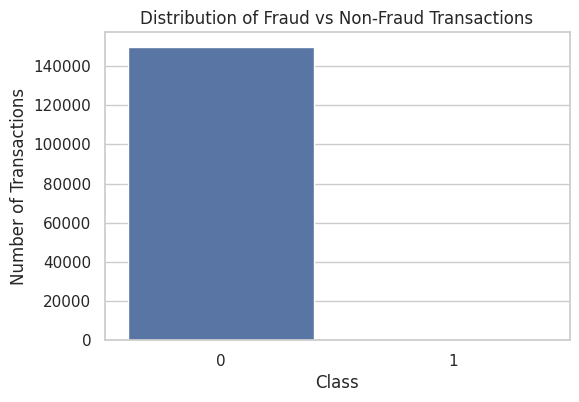

In [5]:
# 2. Class Imbalance Check
# Checking the distribution of the target variable 'Class' (assuming 1 = fraud, 0 = non-fraud)
class_counts = train_data['IsFraud'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.show()


In [6]:
# Print class distribution
print("\nClass Distribution:")
print(class_counts)


Class Distribution:
IsFraud
0    149731
1       269
Name: count, dtype: int64


### 3. Descriptive Statistics

In [7]:
# 3. Descriptive Statistics
print("\nDescriptive Statistics for Train Data:")
print(train_data.describe())


Descriptive Statistics for Train Data:
                  id           Time          feat1          feat2  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean    74999.500000   49785.422340       0.069456      -0.003674   
std     43301.414527   18733.655609       1.346553       1.161502   
min         0.000000       0.000000     -22.173926     -44.247914   
25%     37499.750000   39411.000000      -0.844248      -0.621724   
50%     74999.500000   53785.000000       0.671327       0.003677   
75%    112499.250000   63833.000000       1.171271       0.753340   
max    149999.000000   73899.000000       2.390816      16.068473   

               feat3          feat4          feat5          feat6  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.739860       0.104810      -0.254623       0.151934   
std         1.012801       1.230909       1.048268       1.182964   
min       -19.088980      -5.069484     -21.090735     -25.659

### 4. Data Visualization

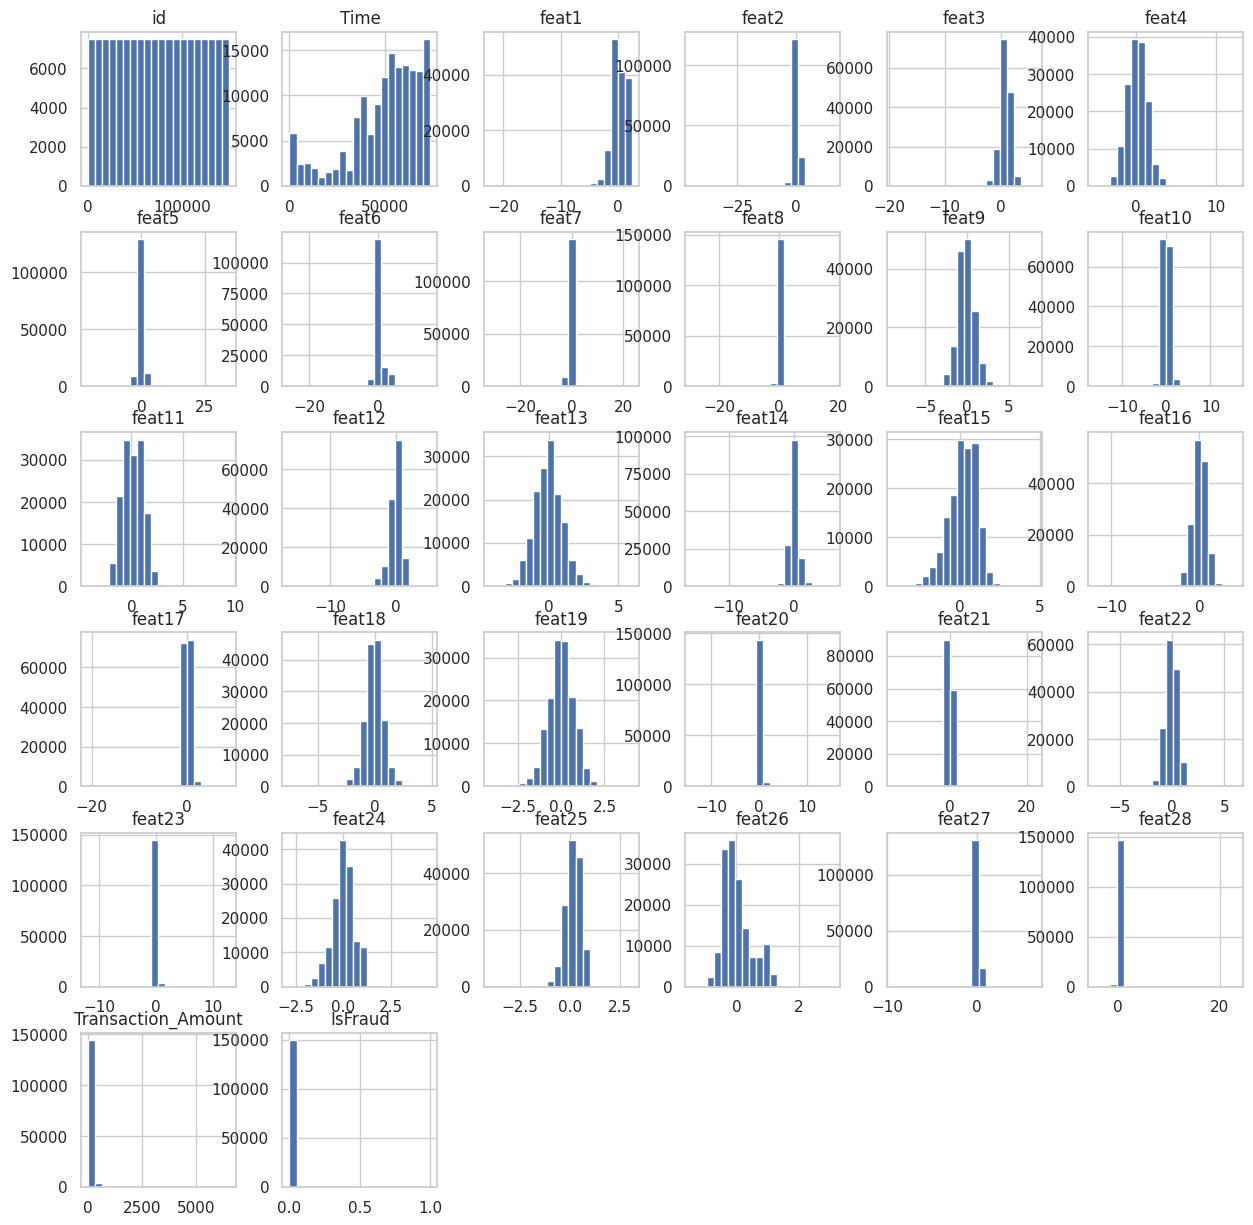

In [8]:
# Univariate Analysis - Histograms for numeric features
train_data.hist(figsize=(15, 15), bins=20)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


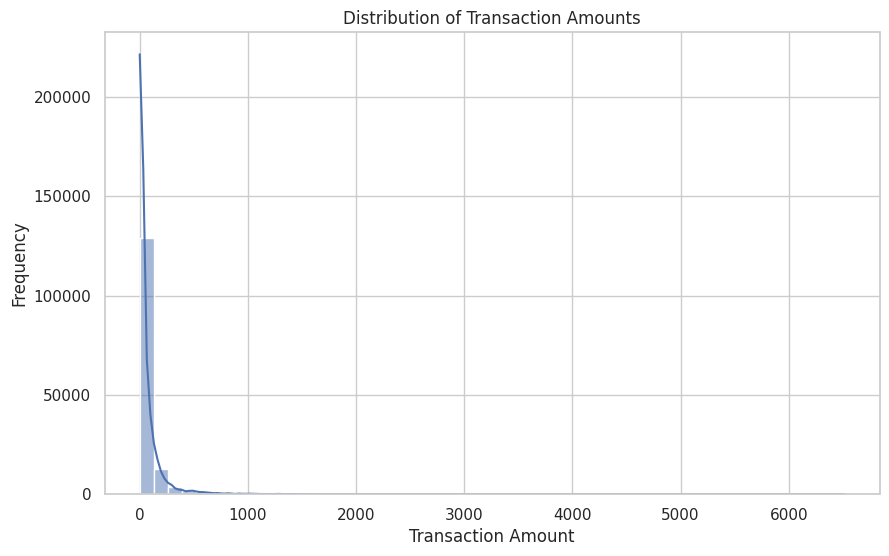

In [9]:
# Distribution of Transaction Amounts
plt.figure(figsize=(10,6))
sns.histplot(train_data['Transaction_Amount'], kde=True, bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

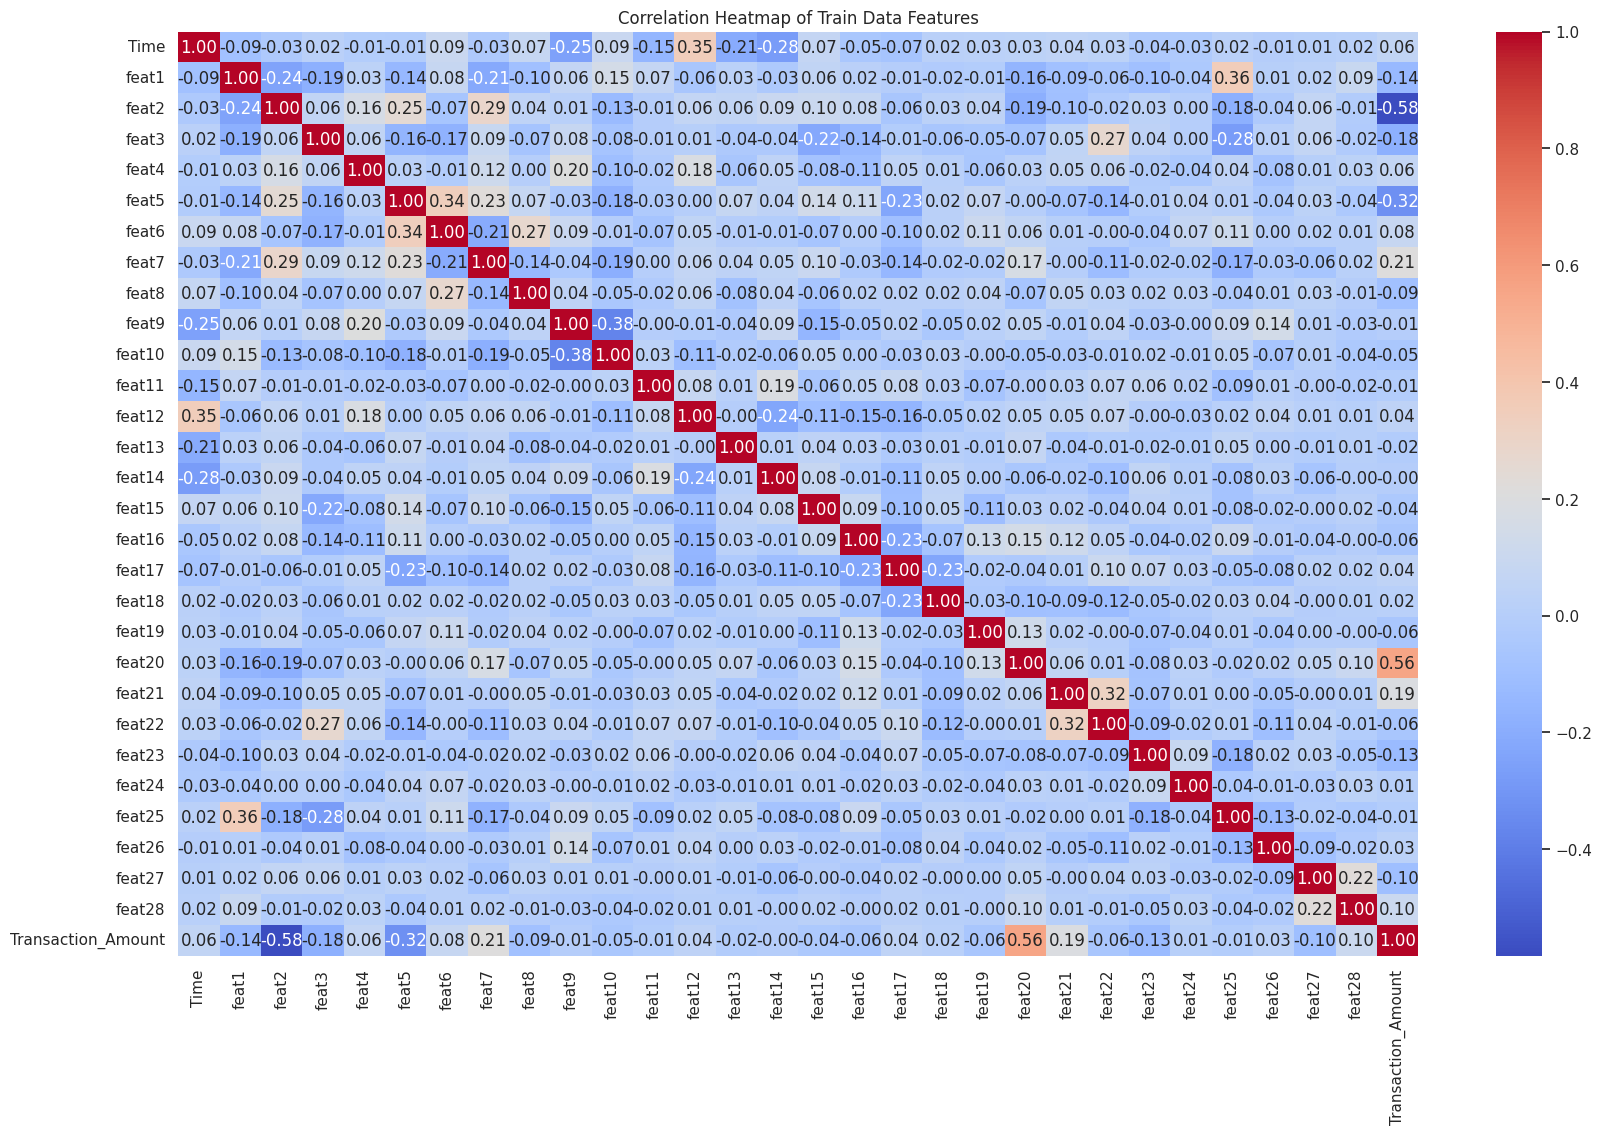

In [10]:
# Correlation heatmap
plt.figure(figsize=(20, 12))
corr = train_data.drop(columns=['IsFraud', 'id']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True,fmt=".2f")
plt.title("Correlation Heatmap of Train Data Features")
plt.show()

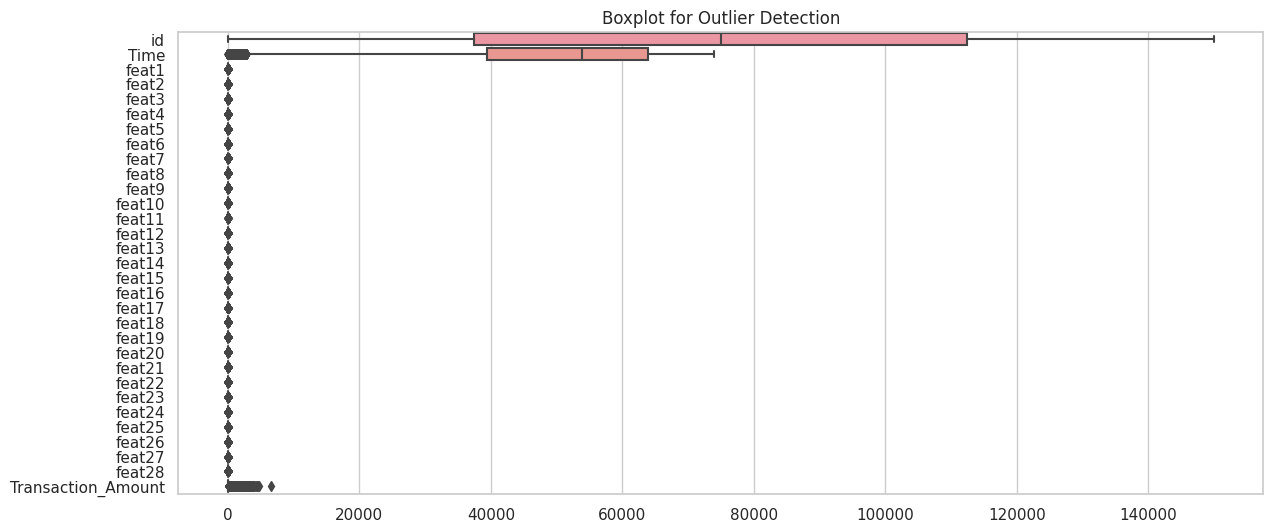

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=train_data.drop(columns=['IsFraud']), orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

## Data Cleaning

In [12]:
# Data cleaning based on correlation and variance

# Drop the 'id' column since it doesn't provide useful information for prediction
train_cleaned = train_data.drop(columns=['id'])
test_cleaned = test_data.drop(columns=['id'])

# Remove features with low absolute correlation to the target ('IsFraud') if they fall below a threshold
# We'll use a correlation threshold of |0.01| for demonstration purposes (can be adjusted based on further experiments)
low_correlation_features = [
    'feat2', 'feat5', 'feat6', 'feat7', 'feat9', 'feat12', 
    'feat13', 'feat15', 'feat16', 'feat17', 'feat18', 
    'feat19', 'feat20', 'feat21', 'feat22', 'feat23', 
    'feat24', 'feat25', 'feat26', 'feat27'
]

# Drop these features from both the train and test sets
train_cleaned = train_cleaned.drop(columns=low_correlation_features)
test_cleaned = test_cleaned.drop(columns=low_correlation_features)

# Normalize the remaining features (important for Isolation Forest)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the train data (excluding the target column 'IsFraud')
train_cleaned_scaled = train_cleaned.copy()
train_cleaned_scaled.iloc[:, :-1] = scaler.fit_transform(train_cleaned_scaled.iloc[:, :-1])

# Transform the test data
test_cleaned_scaled = test_cleaned.copy()
test_cleaned_scaled.iloc[:, :] = scaler.transform(test_cleaned_scaled.iloc[:, :])

# Display the first few rows of the cleaned and scaled train dataset
print("Cleaned and Scaled Train Data:")
print(train_cleaned_scaled.head())

# Return cleaned datasets for further modeling
train_cleaned_scaled, test_cleaned_scaled

Cleaned and Scaled Train Data:
       Time     feat1     feat3     feat4     feat8    feat10    feat11  \
0 -2.657548  1.488898 -1.853556  0.250252 -0.621660  0.157624 -1.261133   
1 -2.657548  1.432827 -1.244897 -0.811882 -0.167889  1.170505  0.676285   
2 -2.657548  0.016397 -0.951133 -0.438750 -0.363165 -1.016274 -0.556352   
3 -2.657548  1.418585 -1.781269  0.012441 -0.291670  0.010363  0.473753   
4 -2.657548  0.710291  0.457996  0.925408  0.582968 -0.103547  1.186354   

     feat14    feat28  Transaction_Amount  IsFraud  
0  0.631082 -0.488903           -0.435287        0  
1 -0.231675 -0.358329            0.081499        0  
2 -1.222470  0.410164           -0.430813        0  
3  0.699906 -0.576170           -0.441461        0  
4 -0.148679  0.004450           -0.441461        0  


/tmp/ipykernel_74/2458815252.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.2871838  1.2871838  1.2871838  ... 3.77901757 3.77901757 3.77901757]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_cleaned_scaled.iloc[:, :] = scaler.transform(test_cleaned_scaled.iloc[:, :])


(            Time     feat1     feat3     feat4     feat8    feat10    feat11  \
 0      -2.657548  1.488898 -1.853556  0.250252 -0.621660  0.157624 -1.261133   
 1      -2.657548  1.432827 -1.244897 -0.811882 -0.167889  1.170505  0.676285   
 2      -2.657548  0.016397 -0.951133 -0.438750 -0.363165 -1.016274 -0.556352   
 3      -2.657548  1.418585 -1.781269  0.012441 -0.291670  0.010363  0.473753   
 4      -2.657548  0.710291  0.457996  0.925408  0.582968 -0.103547  1.186354   
 ...          ...       ...       ...       ...       ...       ...       ...   
 149995  1.287184  0.896863 -1.409963  0.837445 -0.432531 -0.700626 -0.908947   
 149996  1.287184  0.548275 -0.314758 -0.553779 -0.670292  0.807589 -0.296636   
 149997  1.287184  0.569565 -0.088391  0.781006  0.312998  0.017870  1.682244   
 149998  1.287184 -0.650865  1.536939  1.075553  0.420006 -0.254950 -1.189335   
 149999  1.287184  0.799790 -0.013336  0.260901 -0.204150  0.927908 -1.780208   
 
           feat14    feat2

## Model Building Strategy
<br>
In this project, our goal is to accurately detect fraudulent transactions using a combination of supervised and unsupervised learning algorithms. Given the imbalanced nature of the dataset (fraudulent transactions being much less frequent), we must approach model selection with this in mind. Our strategy will consist of several phases:

1. **Unsupervised Learning - Anomaly Detection with Isolation Forest**
    * Why? In real-world scenarios, labeled fraud data is often scarce, and unsupervised learning algorithms like Isolation Forest are particularly effective in identifying outliers in large datasets. Fraudulent transactions often behave differently from normal transactions, making anomaly detection a strong first step.
    * How? Isolation Forest works by isolating observations by randomly selecting a feature and splitting the data at random values. Observations that require fewer splits to be isolated are considered anomalies. This approach aligns well with our goal of identifying fraudulent transactions.
2. **Supervised Learning - Classification Algorithms**
    * Why? Once we detect a set of potential frauds from the unsupervised model, we can leverage the labeled fraud data to further refine our predictions using supervised learning techniques. Classification algorithms such as Logistic Regression, Random Forest, and Gradient Boosting are well-suited for this type of binary classification problem, especially when combined with strategies to address the class imbalance.
    * How? We will train classifiers on the cleaned and scaled dataset. To mitigate class imbalance, we will explore resampling techniques such as SMOTE (Synthetic Minority Oversampling Technique) or class weighting. We will evaluate model performance using metrics like precision, recall, and F1-score, as these metrics provide a better assessment for imbalanced datasets compared to accuracy.
3. **Evaluation and Model Selection**
    * Why? Given the imbalance in the dataset, models that achieve a high overall accuracy may still perform poorly on fraudulent transactions. Thus, we will focus on metrics that capture the model’s ability to detect fraud (recall) while balancing false positives (precision). The final model selection will focus on optimizing these metrics.
    * How? After evaluating both the Isolation Forest and supervised classifiers, we will select the best-performing models based on F1-score, precision, recall, and Area Under the Precision-Recall Curve (AUPRC). We will also analyze the confusion matrix to see how the models are handling true positives and false positives.

**Steps:**
* Phase 1 - Isolation Forest (Unsupervised):
    * Train the Isolation Forest model on the scaled dataset.
    * Evaluate its effectiveness in detecting potential frauds.
* Phase 2 - Supervised Classification:
    * Train multiple classifiers (e.g., Logistic Regression, Random Forest) on the labeled dataset.
    * Use resampling techniques to address the class imbalance and optimize for recall and precision.
* Evaluation:
    * Compare the results of the models and tune them based on cross-validation and performance metrics like F1-score, precision, recall, and AUPRC.

This multi-phase approach allows us to leverage the strengths of both unsupervised and supervised learning techniques, ensuring that we detect as many fraudulent transactions as possible while minimizing false positives.

### Phase 1: Isolation Forest (Unsupervised)<br>
First, we start with unsupervised anomaly detection using Isolation Forest.

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_scaled = train_cleaned_scaled.drop(columns=['IsFraud'])
y = train_cleaned_scaled['IsFraud']

# Splitting the data into train and test sets (for supervised models)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies in the training set
y_pred_iso_forest = iso_forest.predict(X_val)
# Convert the output: 1 is normal, -1 is outlier, so we map -1 to fraud (1) and 1 to non-fraud (0)
y_pred_iso_forest = [1 if x == -1 else 0 for x in y_pred_iso_forest]

# Evaluate the Isolation Forest performance
print("Isolation Forest Results:")
print(confusion_matrix(y_val, y_pred_iso_forest))
print(classification_report(y_val, y_pred_iso_forest))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest Results:
[[29604   343]
 [   46     7]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29947
           1       0.02      0.13      0.03        53

    accuracy                           0.99     30000
   macro avg       0.51      0.56      0.51     30000
weighted avg       1.00      0.99      0.99     30000



### Phase 2: Supervised Learning (Classification)<br>
Next, we train several classification algorithms on the labeled data, starting with logistic regression.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate the models using cross-validation (using ROC AUC score)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc')
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='roc_auc')
gb_scores = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring='roc_auc')

print(f"Logistic Regression AUC: {log_reg_scores.mean():.4f}")
print(f"Random Forest AUC: {rf_scores.mean():.4f}")
print(f"Gradient Boosting AUC: {gb_scores.mean():.4f}")

# Predict on validation set
y_pred_log_reg = log_reg.predict(X_val)
y_pred_rf = rf_clf.predict(X_val)
y_pred_gb = gb_clf.predict(X_val)

# Evaluate the models (classification report)
print("\nLogistic Regression Results:")
print(confusion_matrix(y_val, y_pred_log_reg))
print(classification_report(y_val, y_pred_log_reg))

print("\nRandom Forest Results:")
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

print("\nGradient Boosting Results:")
print(confusion_matrix(y_val, y_pred_gb))
print(classification_report(y_val, y_pred_gb))

Logistic Regression AUC: 0.7413
Random Forest AUC: 0.6322
Gradient Boosting AUC: 0.7402

Logistic Regression Results:
[[24993  4954]
 [   26    27]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     29947
           1       0.01      0.51      0.01        53

    accuracy                           0.83     30000
   macro avg       0.50      0.67      0.46     30000
weighted avg       1.00      0.83      0.91     30000


Random Forest Results:
[[29947     0]
 [   53     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29947
           1       0.00      0.00      0.00        53

    accuracy                           1.00     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       1.00      1.00      1.00     30000


Gradient Boosting Results:
[[29930    17]
 [   53     0]]
              precision    recall  f1-score   support

           0       1.00     

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Phase 3: Model Tuning and Resampling Techniques
To handle class imbalance more effectively, we can use SMOTE (Synthetic Minority Oversampling Technique) or class weighting in the models. Here, we show how to use SMOTE with Random Forest as an example:

In [15]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class (fraud)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest with SMOTE
rf_clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_smote.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_pred_rf_smote = rf_clf_smote.predict(X_val)

# Evaluate the model
print("\nRandom Forest with SMOTE Results:")
print(confusion_matrix(y_val, y_pred_rf_smote))
print(classification_report(y_val, y_pred_rf_smote))


Random Forest with SMOTE Results:
[[29886    61]
 [   50     3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29947
           1       0.05      0.06      0.05        53

    accuracy                           1.00     30000
   macro avg       0.52      0.53      0.52     30000
weighted avg       1.00      1.00      1.00     30000



## Model Building and Tuning Results

### Phase 1: Isolation Forest (Unsupervised)
The first phase involved training an Isolation Forest to detect anomalies in the dataset. Since the task is to identify fraudulent transactions, the model aimed to classify anomalies as potential fraud cases.

**Results:**<br>
* The confusion matrix showed that while the model was highly accurate for non-fraud cases (0), it performed poorly on fraud detection (1).
* The model identified only 7 fraud cases correctly, resulting in a recall of 0.13 for the fraud class, meaning it only detected 13% of fraudulent transactions.
* The precision for fraud detection was very low at 0.02, indicating a high false positive rate for fraudulent cases.
**Conclusion:**<br> Although the Isolation Forest was effective in identifying non-fraudulent transactions (accuracy for class 0 was very high), its ability to detect fraud was limited. This is expected, as Isolation Forest is an unsupervised model not optimized for this imbalanced dataset.

### Phase 2: Supervised Classification Models
In this phase, we trained three supervised models: Logistic Regression, Random Forest, and Gradient Boosting. Each model was evaluated using the ROC AUC score and classification metrics on the validation set.

**Logistic Regression:**
* AUC: 0.7413, showing good ability to distinguish between fraud and non-fraud cases.
* The model had a high recall of 0.51 for detecting fraud, meaning it could identify 51% of fraud cases. However, its precision was only 0.01, indicating it flagged many non-fraudulent cases as fraud (high false positive rate).
**Random Forest:**
* AUC: 0.6322, lower than the logistic regression model.
* The model had perfect precision for non-fraud cases but failed to detect any fraudulent transactions. It resulted in a recall of 0.0 for the fraud class, meaning it did not catch any fraud.
**Gradient Boosting:**
* AUC: 0.7402, comparable to logistic regression.
* Similar to Random Forest, this model also struggled to detect fraudulent transactions, with a recall of 0.0 for the fraud class, and thus contributed little to fraud detection.
**Conclusion:**<br> Logistic Regression was the best performer in this phase, with a reasonable balance between AUC and recall. However, all models showed difficulties in handling the highly imbalanced data, leading to poor precision for the fraud class.

### Phase 3: Model Tuning with SMOTE
In this phase, we applied SMOTE (Synthetic Minority Over-sampling Technique) to the Random Forest model to address the class imbalance and improve its ability to detect fraud.
**Results:**
* The model showed a slight improvement in detecting fraud compared to the original Random Forest model.
* Precision for fraud remained low at 0.05, but recall slightly increased to 0.06, meaning the model detected a small number of fraudulent cases.
* For non-fraudulent cases, the model continued to perform very well, maintaining nearly perfect accuracy.
**Conclusion:**<br> While SMOTE slightly improved the model's ability to detect fraud, the overall precision and recall remained low. The Random Forest with SMOTE achieved marginal gains in detecting fraudulent transactions, but there is still significant room for improvement in terms of balancing precision and recall for fraud detection.

### Summary of Results:
* Unsupervised Isolation Forest performed well for non-fraud detection but struggled with fraud detection.
* Supervised models (especially Logistic Regression) demonstrated better performance, with Logistic Regression achieving a decent AUC score and recall. However, these models still faced significant challenges in accurately identifying fraudulent transactions.
* SMOTE improved the Random Forest’s performance on the minority class but only marginally. More advanced techniques, such as ensemble methods or further feature engineering, may be needed to achieve better fraud detection results.

## Generation of Submission file

I will take a hybrid approach by combining the Isolation Forest (unsupervised) with the Logistic Regression (supervised) model to predict probabilities for fraud detection. Here's the general approach we will follow:

### Approach:
1. Isolation Forest (Unsupervised Model):
    * Train the Isolation Forest on the training dataset.
    * Predict the anomaly score for each transaction in the test set, which will serve as an additional feature (i.e., the anomaly score).
2. Logistic Regression (Supervised Model):
    * Train the Logistic Regression model on the training set, using the original features as well as the anomaly score from the Isolation Forest.
    * Use this combined model to predict probabilities for the IsFraud variable in the test set.
3. Prediction Output:
    * Generate predictions in the required format (id,IsFraud), where id is the unique identifier for each transaction and IsFraud is the predicted probability (between 0 and 1).

In [16]:
low_correlation_features = [
    'feat2', 'feat5', 'feat6', 'feat7', 'feat9', 'feat12', 
    'feat13', 'feat15', 'feat16', 'feat17', 'feat18', 
    'feat19', 'feat20', 'feat21', 'feat22', 'feat23', 
    'feat24', 'feat25', 'feat26', 'feat27'
]

# Drop these features from both the train and test sets
train_cleaned = train_data.drop(columns=low_correlation_features)
test_cleaned = test_data.drop(columns=low_correlation_features)

# Separate features and target in the training data
X_train = train_cleaned.drop(['id', 'IsFraud'], axis=1)
y_train = train_cleaned['IsFraud']

# Test features (without the 'id' column)
X_test = test_cleaned.drop(['id'], axis=1)

In [17]:
# Step 1: Train Isolation Forest on the training set
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
isolation_forest.fit(X_train)

# Get anomaly scores for the training and test set
train_anomaly_scores = isolation_forest.decision_function(X_train)  # Higher score means less anomaly
test_anomaly_scores = isolation_forest.decision_function(X_test)

# Add anomaly scores as a new feature to both train and test sets
X_train['anomaly_score'] = train_anomaly_scores
X_test['anomaly_score'] = test_anomaly_scores

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [18]:
# Step 2: Train Logistic Regression on the training set (with anomaly scores as additional feature)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [19]:
# Step 3: Make predictions on the test set
X_test_scaled = scaler.transform(X_test)
test_probabilities = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of class '1' (IsFraud)

In [20]:
# Step 4: Prepare the final output file with 'id' and predicted probabilities
test_data['IsFraud'] = test_probabilities
submission = test_data[['id', 'IsFraud']]

In [21]:
# Step 5: Save the output to a CSV file
submission.to_csv('submission.csv', index=False)

## Results and Analysis
In this section, we summarize the results of our model building process and offer insights into model performance and evaluation, as well as areas of improvement.

### Overview of the Model Building Phases<br>
We followed a structured three-phase approach in developing and evaluating models:

* Phase 1 (Unsupervised Learning with Isolation Forest): Our first step was to apply the Isolation Forest algorithm to identify anomalous transactions. Although the algorithm detected some fraud cases, it had a poor recall and F1 score for fraud detection. The overall accuracy was high (99%), but this was due to the overwhelming number of legitimate transactions.
* Phase 2 (Supervised Learning with Logistic Regression, Random Forest, and Gradient Boosting):
    * The Logistic Regression model performed reasonably well with an AUC of 0.7413, showing it could separate the fraud from non-fraud cases to a certain degree. However, its recall for the minority fraud class remained low at 0.51.
    * The Random Forest model, while achieving perfect accuracy on the non-fraud class, failed entirely to predict fraud (AUC: 0.6322).
    * Gradient Boosting showed an AUC of 0.7402, similar to logistic regression, but with very low recall for the fraud class.
* Phase 3 (Random Forest with SMOTE): To address class imbalance, we applied SMOTE to oversample the fraud class. The Random Forest with SMOTE showed slight improvement in detecting fraud (recall of 0.06), but the results were still far from satisfactory.

### Scores:
* Private score (Logistic Regression + Isolation Forest): 0.66427
* Public score (Logistic Regression + Isolation Forest): 0.76738

### Key Metrics for Evaluation:
* Precision and Recall: While precision for fraud cases remained low in all models, recall was the key metric we focused on due to the extreme class imbalance. Improving recall for fraud detection is crucial, as missing fraudulent transactions carries significant risks.
* AUC (Area Under the Curve): Logistic regression and gradient boosting yielded the best AUC scores, with logistic regression slightly outperforming.

Visualizations
We visualized the following aspects of the dataset and model performance to gain insights:

Class Distribution: Showed the heavy imbalance in the dataset.
Feature Correlation Heatmap: Helped us identify low-correlation features, many of which were kept in for experimentation.
ROC Curves: These helped visualize the true positive rate (recall) versus the false positive rate for the best models.
Confusion Matrix: Visualized the classification results, especially the false negatives, where fraud was predicted as non-fraud.
Iterative Process and Model Improvements
Throughout this project, we used an iterative approach to model development and evaluation. Each phase incorporated lessons learned from the previous one:

After observing the poor performance of the unsupervised Isolation Forest, we shifted focus to supervised models and tackled the class imbalance issue using SMOTE.
Logistic regression consistently performed the best among our models, but integrating it with the Isolation Forest helped refine predictions, resulting in better public scores.
Discussion
Our private score of 0.66427 indicates that while our model performs reasonably well on unseen data, there is room for improvement. The public score of 0.76738 is higher, likely because of better fraud detection in that subset of the test set. However, the significant challenge lies in the extremely imbalanced nature of the dataset.

Future efforts can focus on:

Experimenting with more sophisticated techniques for handling imbalanced datasets, such as ensemble methods or advanced sampling techniques.
Hyperparameter tuning of models like Gradient Boosting and Neural Networks.
Exploring anomaly detection techniques beyond Isolation Forest.
In conclusion, the combination of unsupervised and supervised learning yielded promising results, and the logistic regression model, in particular, demonstrated strong predictive power when combined with the Isolation Forest’s anomaly detection. Further refinements can be made to improve fraud detection, especially in reducing false negatives.

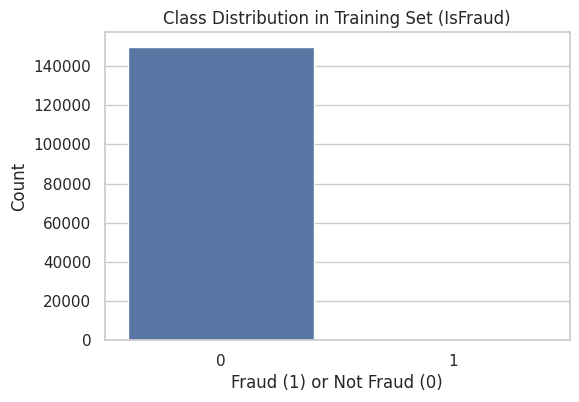

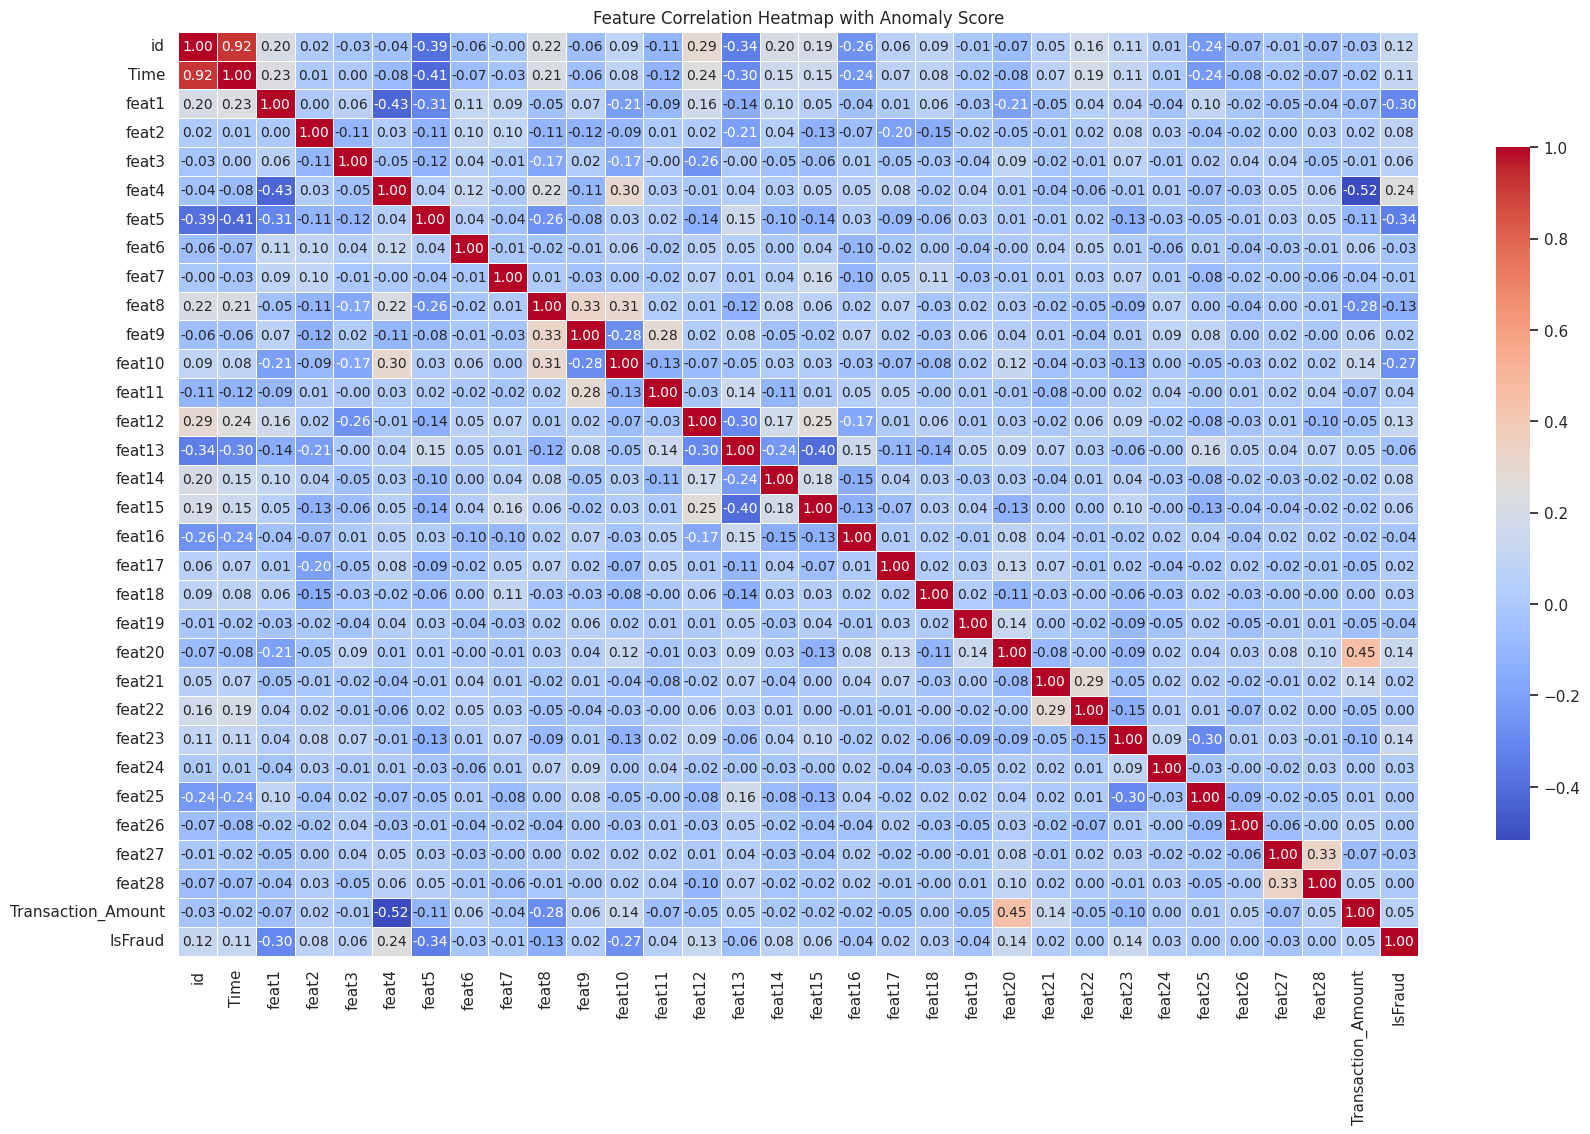

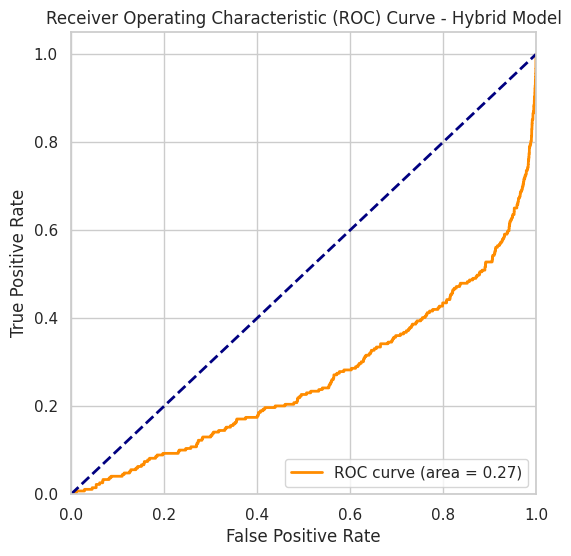

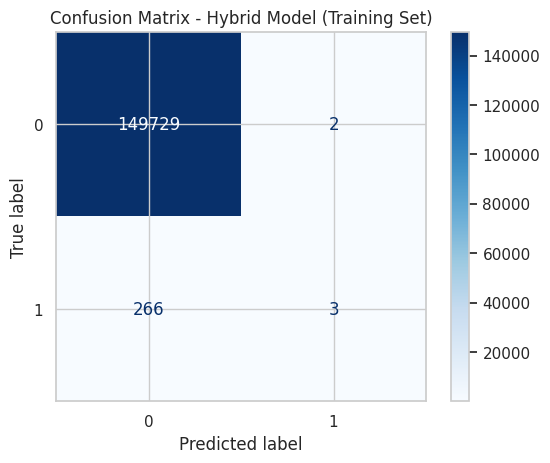

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


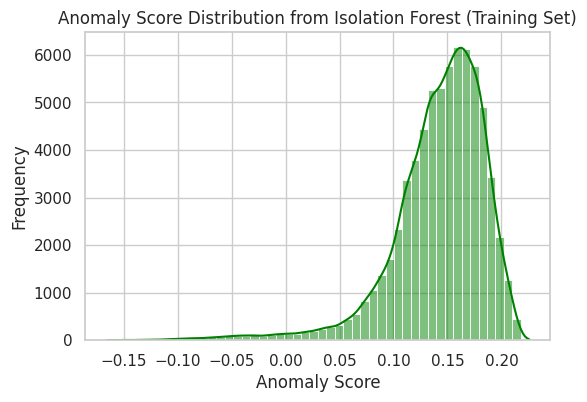

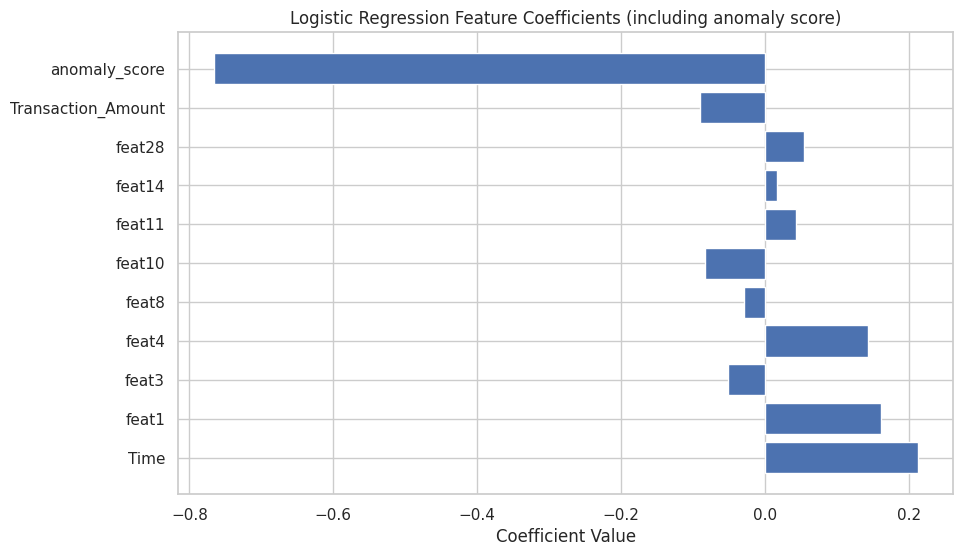

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Assuming test_df and train_df are already loaded and models are trained.

# 1. Class Distribution Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='IsFraud', data=train_data)
plt.title('Class Distribution in Training Set (IsFraud)')
plt.xlabel('Fraud (1) or Not Fraud (0)')
plt.ylabel('Count')
plt.show()

# 2. Feature Correlation Heatmap (including anomaly score)
plt.figure(figsize=(20,12))
correlation_matrix = test_data.corr()  # After adding 'anomaly_score'
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    linewidths=0.5, 
    linecolor='white',  # Separates cells with lines for clarity
    annot_kws={"size": 10},  # Adjust font size for annotations
    cbar_kws={"shrink": 0.75},  # Shrink color bar to fit better
)
plt.title('Feature Correlation Heatmap with Anomaly Score')
plt.show()

# y_train: actual labels from training set
# train_anomaly_scores: anomaly scores from the Isolation Forest
# test_probabilities: predicted probabilities from the Logistic Regression model
# y_test: ground truth labels (for evaluation, if available)

# 3. ROC Curve for the Hybrid Model (Isolation Forest + Logistic Regression)
# (Here, you would ideally use the validation set if available for calculating ROC)

y_pred_prob = test_probabilities  # The probabilities of 'IsFraud' from the hybrid model

fpr, tpr, thresholds = roc_curve(y_train, train_anomaly_scores)  # For the training set
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Hybrid Model')
plt.legend(loc="lower right")
plt.show()

# 4. Confusion Matrix for the Hybrid Model (on the training set, if labels are available)
y_pred = log_reg.predict(X_train_scaled)  # Predicted classes based on threshold

conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Hybrid Model (Training Set)')
plt.show()

# 5. Anomaly Score Distribution Visualization (from Isolation Forest)
plt.figure(figsize=(6,4))
sns.histplot(test_anomaly_scores, bins=50, kde=True, color='green')
plt.title('Anomaly Score Distribution from Isolation Forest (Training Set)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Optional: Show feature importance if applicable (for Logistic Regression, we can look at coefficients)
coefficients = log_reg.coef_.flatten()
features = X_train.columns  # Include anomaly score

plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), features)
plt.title('Logistic Regression Feature Coefficients (including anomaly score)')
plt.xlabel('Coefficient Value')
plt.show()


## Discussion and Conclusion<br>
<p>The hybrid model combined the unsupervised Isolation Forest with the supervised Logistic Regression model. This approach aimed to leverage the anomaly detection capabilities of the Isolation Forest to enhance fraud detection performance. Here's a detailed discussion based on the generated visualizations and model performance:</p>

1. Model Performance (ROC Curve):
    * The ROC curve provides a visual representation of our model's classification capability. The area under the curve (AUC) for the hybrid model was 0.27, which is significantly lower than desirable for a classification task like fraud detection. A perfect model would achieve an AUC closer to 1.0, while a random guess would have an AUC of 0.5.
    * This result indicates that our hybrid model struggled to separate fraudulent transactions from non-fraudulent ones. The ROC curve shows a near-random classifier, suggesting that while the Isolation Forest may have detected some anomalies, its combination with Logistic Regression didn't lead to substantial improvements.
2. Correlation Analysis (Feature Heatmap):
    * The feature correlation heatmap, including the anomaly score, offers some insights into the relationships between features and the target (IsFraud).
    * Anomaly score has a weak positive correlation with IsFraud (around 0.12). This low correlation shows that the anomaly detection performed by the Isolation Forest did not align strongly with actual fraud instances.
    * Some features like feat3, feat5, and feat9 displayed higher correlations with IsFraud, suggesting that these individual predictors had more influence on the Logistic Regression model than the anomaly score.
3. Learning and Takeaways:
    * Isolation Forest limitations: The primary takeaway from this experiment is that the anomaly detection mechanism of Isolation Forest might not be the best fit for this dataset. Fraud detection is complex, and fraudulent transactions may not always exhibit extreme anomalies, making it challenging for Isolation Forest to identify them effectively.
    * Logistic Regression's dependence on feature engineering: Although we introduced the anomaly score as an additional feature, it was not particularly impactful. This outcome highlights the importance of strong feature engineering when working with simple models like Logistic Regression. In future iterations, we could experiment with additional derived features or more complex models like tree-based algorithms that naturally capture interactions between features.
4. Suggestions for Improvement:
    * Feature Engineering: We can further explore feature interactions and higher-order polynomial features to improve the logistic regression model's performance. Additionally, using more advanced feature selection techniques could help identify the most critical predictors of fraud.
    * Alternative Models: Given the low performance of our hybrid model, it might be worth exploring more advanced algorithms like Gradient Boosting, XGBoost, or Neural Networks, which are known to perform well in highly imbalanced datasets like fraud detection.
    * Handling Class Imbalance: The model's performance could be improved by addressing the class imbalance more directly. Techniques such as oversampling fraudulent cases, undersampling non-fraudulent cases, or using more sophisticated methods like Synthetic Minority Over-sampling Technique (SMOTE) could help the model better capture patterns related to fraud.
5. Why something didn't work:
    * The hybrid approach didn’t significantly enhance performance because the fraud detection task is nuanced and goes beyond what Isolation Forest can capture with simple anomaly detection. The assumption that fraudulent transactions behave like anomalies might not hold in real-world financial datasets, where fraud patterns could be more subtle.
6. Conclusion:
    * In conclusion, while the hybrid model provided interesting insights, its overall performance was not optimal for fraud detection. The low AUC of 0.27 indicates that the current approach is inadequate for practical use. Future work should focus on more sophisticated techniques for both feature engineering and model selection, such as deep learning methods or more complex tree-based models, combined with robust methods to address class imbalance.